Differences betwee running old and new smelt code woth various smelt namelists

In [15]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import xarray as xr
from salishsea_tools import tidetools, geo_tools, viz_tools, nc_tools
import pytz
import os
import glob
import cmocean
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

In [21]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [5]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

# SiRatio1

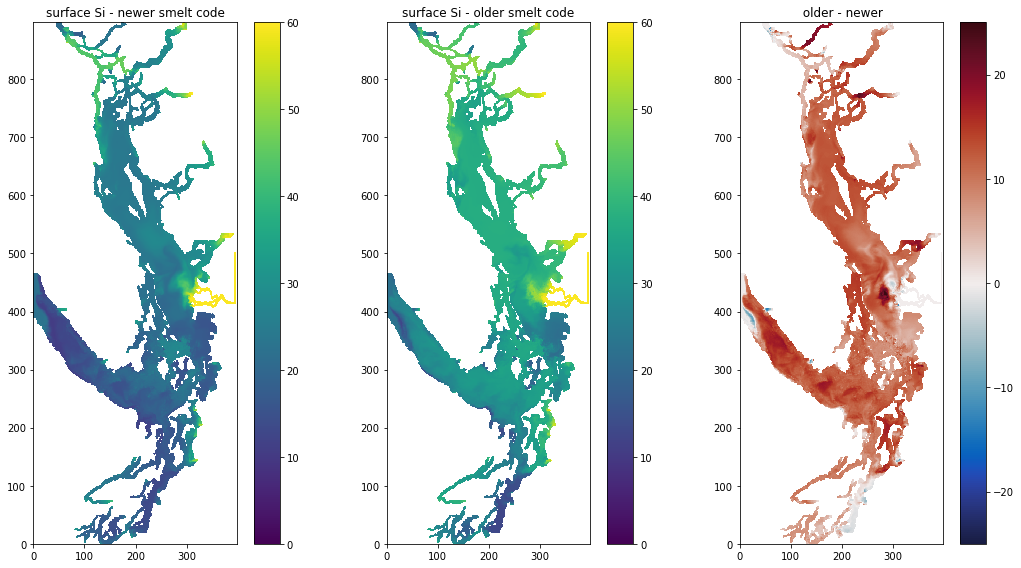

In [20]:
old = nc.Dataset(
    '/data/vdo/MEOPAR/completed-runs/smelt1/test99/SalishSea_1h_20150422_20150501_ptrc_T_20150430-20150430.nc')
new = nc.Dataset(
    '/data/vdo/MEOPAR/completed-runs/SiRatio1/test9/SalishSea_1h_20150422_20150501_ptrc_T_20150501-20150501.nc')

fig, ax = plt.subplots(1,3, figsize = ((15,8)))
s0 = ax[0].pcolormesh(np.ma.masked_array(old.variables['silicon'][-1, 0, ...], 
                                    mask = 1 - mesh.variables['tmask'][0,0,...]), vmax = 60, vmin = 0)
fig.colorbar(s0, ax=ax[0])
s1 = ax[1].pcolormesh(np.ma.masked_array(new.variables['silicon'][-1, 0, ...], 
                                    mask = 1 - mesh.variables['tmask'][0,0,...]), vmax = 60, vmin = 0)
fig.colorbar(s1, ax=ax[1])
s2 = ax[2].pcolormesh(np.ma.masked_array(new.variables['silicon'][-1, 0, ...] 
                                    - old.variables['silicon'][-1, 0, ...], 
                                    mask = 1 - mesh.variables['tmask'][0,0,...]), vmax = 25, vmin = -25, cmap = cmocean.cm.balance)
fig.colorbar(s2, ax=ax[2])
ax[0].set_title('surface Si - newer smelt code')
ax[1].set_title('surface Si - older smelt code')
ax[2].set_title(' older - newer')
for ax in ax:
    viz_tools.set_aspect(ax)
plt.tight_layout()